In [1]:
import ROOT as rt
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F

Welcome to JupyROOT 6.22/09


In [2]:
h_trueAndReco = rt.TH1F("h_trueAndReco","Purity",100, 0, 2)
h_true = rt.TH1F("h_true","True",100, 0, 2)
h_reco = rt.TH1F("h_reco","Reco",100, 0, 2)

In [3]:
f = TFile("selectedEventsTrueRecoBoth_091524.root","READ")
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

10913


In [4]:
# making plots in terms of reco muon momentum on the x-axis (so filling with this)

for e in range(entries):

    t.GetEntry(e)
    
    if (t.passedSel_ == 2) or (t.passedSel_ == 3): # passes reco selection
        h_reco.Fill(t.recoSel_recoMomMu_, t.weight_)
        if (t.passedSel_ == 1) or (t.passedSel_ == 3): # passes truth selection
            h_trueAndReco.Fill(t.recoSel_recoMomMu_, t.weight_)

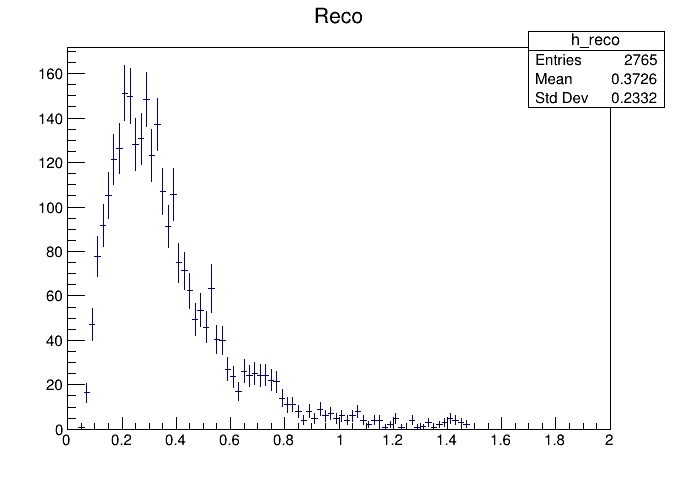

In [5]:
c1 = TCanvas("c1","c1",720,152,682,505)
c1.cd()
h_reco.Draw("")

c1.Draw()

In [6]:
targetPOT = 1.3e21
simPOT = 4.68e20 # this is for run 1

h_trueAndReco.Scale(targetPOT/simPOT)
h_true.Scale(targetPOT/simPOT)
h_reco.Scale(targetPOT/simPOT)

h_purity:  Name: h_purity Title: Purity NbinsX: 100


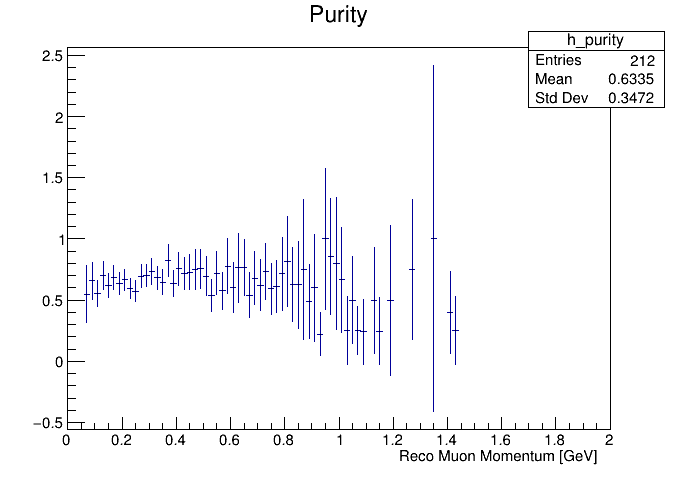

In [7]:
h_purity = h_trueAndReco.Clone("h_purity")
h_purity.Divide(h_reco)

print("h_purity: ", h_purity)

h_purity.GetXaxis().SetTitle("Reco Muon Momentum [GeV]")

canvas = TCanvas("canvas","canvas",720,152,682,505)
canvas.cd()
h_purity.Draw("")

canvas.Draw()

#outfile = rt.TFile("plots.root","RECREATE")
#canvas.Write()



In [14]:
# create stacked histogram

hs = rt.THStack("hs", "Stacked Purity Plot")
hs.Add(h_purity, "hist")
hs.Add(h_purity, "hist")
#hs.Add(hBkg1, "hist")

# Create a canvas
c = rt.TCanvas("c", "Stacked Purity Plot", 800, 600)

# Draw the stacked histogram
hs.Draw("hist")
hs.GetXaxis().SetTitle("Bin")
hs.GetYaxis().SetTitle("Events")

c.Draw()

AttributeError: 'THStack' object has no attribute 'SetFillColor'